# 표준화

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('housingsample.csv')
df

,Price,Sq Feet,Age
0,90300,1700,14
1,150500,1518,27
2,269500,2708,22
3,98000,830,15
4,244650,2550,28


In [ ]:
price_mean = df['Price'].mean()
price_std = df['Price'].std()
print('mean =', price_mean, ', std =', price_std)

mean = 170590.0 , std = 82745.80351897007


In [ ]:
(df.Price - price_mean) / price_std

0   -0.970321
1   -0.242792
2    1.195348
3   -0.877265
4    0.895030
Name: Price, dtype: float64

In [ ]:
for i in range(df.shape[1]):
    col = df.iloc[:, i]
    col = (col - col.mean()) / col.std()
    df.iloc[:, i] = col


df

,Price,Sq Feet,Age
0,-0.970321,-0.208166,-1.101840
1,-0.242792,-0.443193,0.887593
2,1.195348,1.093519,0.122427
3,-0.877265,-1.331645,-0.948807
4,0.895030,0.889485,1.040627


In [ ]:
from sklearn import preprocessing

In [ ]:
housing = pd.read_csv('housingsample.csv')
housing

,Price,Sq Feet,Age
0,90300,1700,14
1,150500,1518,27
2,269500,2708,22
3,98000,830,15
4,244650,2550,28


In [ ]:
standardized = preprocessing.scale(housing)
standardized

array([[-1.08485198, -0.2327371 , -1.23189464],
       [-0.27144945, -0.4955048 ,  0.99235957],
       [ 1.33643928,  1.22259167,  0.13687718],
       [-0.98081212, -1.48882443, -1.06079816],
       [ 1.00067428,  0.99447466,  1.16345605]])

In [ ]:
pd.DataFrame(standardized, columns = ['Price', 'Sq.feet', 'Age'])

,Price,Sq.feet,Age
0,-1.084852,-0.232737,-1.231895
1,-0.271449,-0.495505,0.992360
2,1.336439,1.222592,0.136877
3,-0.980812,-1.488824,-1.060798
4,1.000674,0.994475,1.163456


# 정규화

In [ ]:
for i in range(df.shape[1]):
    col = df.iloc[:, i]
    col = (col - col.min()) /(col.max() - col.min())
    df.iloc[:, i] = col


df

,Price,Sq Feet,Age
0,0.000000,0.463259,0.000000
1,0.335937,0.366347,0.928571
2,1.000000,1.000000,0.571429
3,0.042969,0.000000,0.071429
4,0.861328,0.915868,1.000000


In [ ]:
normalized = preprocessing.MinMaxScaler().fit_transform(housing)

In [ ]:
pd.DataFrame(normalized, columns = ['Price', 'Sq.feet', 'Age'])

,Price,Sq.feet,Age
0,0.000000,0.463259,0.000000
1,0.335938,0.366347,0.928571
2,1.000000,1.000000,0.571429
3,0.042969,0.000000,0.071429
4,0.861328,0.915868,1.000000


# 정규성 검정

In [ ]:
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Density'>

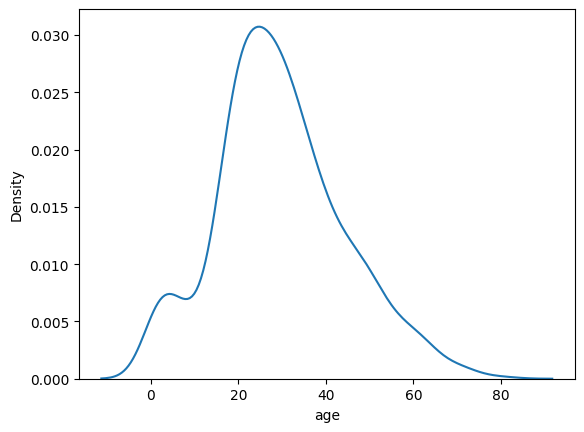

In [ ]:
sns.kdeplot(titanic['age'].dropna())

<ipython-input-17-8ef49f76e987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'].dropna())


<Axes: xlabel='age', ylabel='Density'>

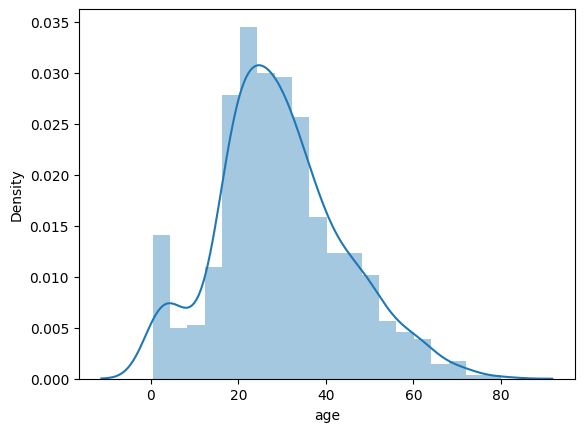

In [ ]:
sns.distplot(titanic['age'].dropna())

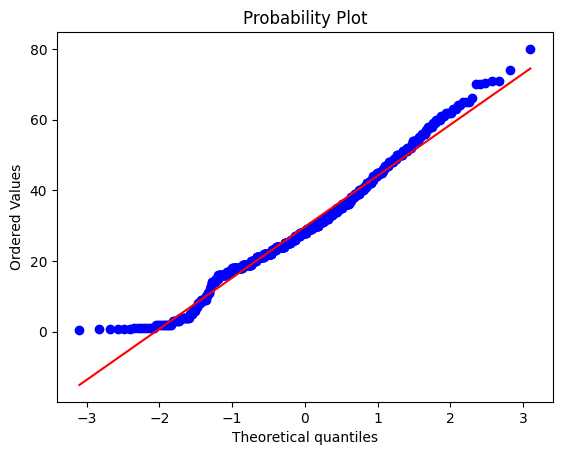

In [ ]:
# Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(titanic['age'].dropna(),  plot = plt)
plt.show()

# Dimensionality Reduction

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris = iris.drop(['species'], axis = 1)

corr = iris.corr().round(2)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00
